<a href="https://colab.research.google.com/github/Shreya-07/CMPE255_catchup-assignment-part-1-/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from scipy.spatial import distance_matrix

%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
data = pd.read_csv('/content/gdrive/MyDrive/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
data = data.rename(columns={"class":"Species"})
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
species = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica' : 2}
data['Species_code'] = [species[item] for item in data.Species]
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [17]:
groups=data.groupby('Species')
groups.count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_code
Species,,,,,,
Iris-setosa,50,50,50,50,50,50
Iris-versicolor,50,50,50,50,50,50
Iris-virginica,50,50,50,50,50,50


In [20]:
features = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
dataset= features.values
dataset

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
def k_means(X, K):
    nrow = X.shape[0] #no of rows
    ncol = X.shape[1] #no of coloumns
    
    #pick k random points as initial centeroids
    initial_centeroids = np.random.choice(nrow, K, replace=False) # chose K random number from the given range (0 to nrow)

    #select the data point that will serve as initial centeroids
    centeroids = X[initial_centeroids] #ex: initial = [10,45,2]; centeroids = [ x[10] , x[45] , x[2] ]
    
    #creating a varialble that holds value of centeroids from previous step
    centeroids_old = np.zeros((K, ncol)) #2D array initialized with 0 of shape(K x ncols)
    
    #variable for cluster assignent
    cluster_assignment = np.zeros(nrow) # creates 1D array with no of elements = nrows initially all assigned with 0
    while (centeroids_old != centeroids).any(): #Repeat until centeroids dont change
        centeroids_old = centeroids.copy()#save new centeroids value before updating,in order to check later if centeroids changes
        
        #compute the distances between data points and centeroids
        dist_matrix = distance_matrix(X, centeroids) #returns a matrix containing distance between every object in X and every object in centeroids
        
        for i in np.arange(nrow):
            # for each row in X (each data point) find closest centeroid / centeroid with minimum distance between them
            d = dist_matrix[i]
            closest_centeroid = (np.where(d == np.min(d)))[0][0]
            
            #associate data points with closest centeroid
            cluster_assignment[i] = closest_centeroid 
            
        #recompute centeroids
        for k in np.arange(K):
            Xk = X[cluster_assignment == k] #Xk is 2d Array: contains K rows; row 0 : array of all datapoints assigned to cluster 0
                                            #row k : contains araay of all datapoints assigned to cluster k
            centeroids[k] = np.apply_along_axis(np.mean, axis=0, arr= Xk) #calculate mean row wise (mean of each cluster)
            
    return (centeroids, cluster_assignment)

Text(0, 0.5, 'Sepal Width')

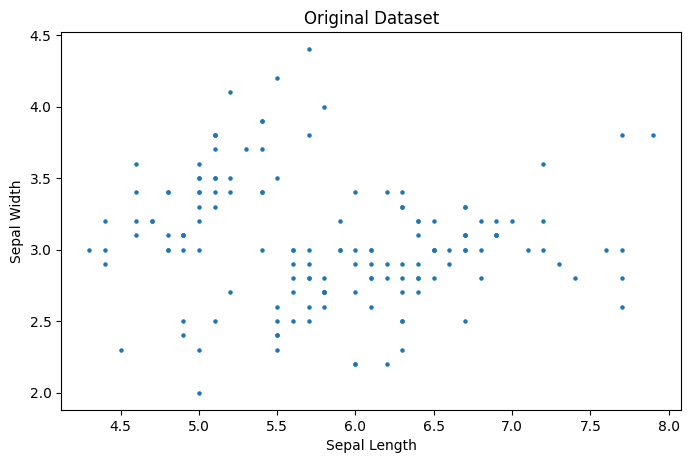

In [23]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 500/my_dpi), dpi = my_dpi)

plt.scatter(dataset[:,0],dataset[:,1], s = 5)
plt.title("Original Dataset")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

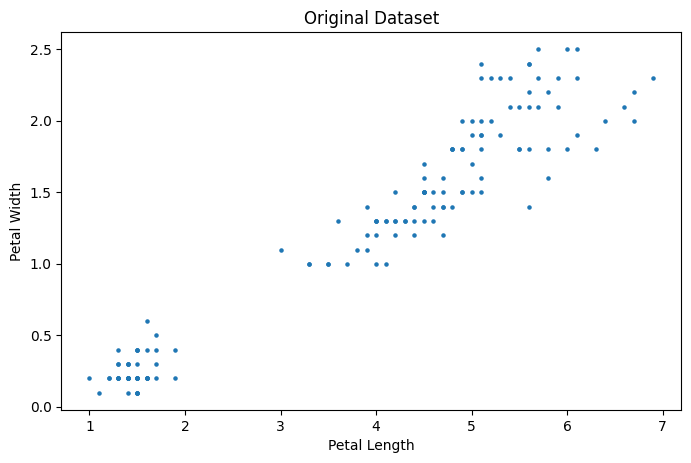

In [24]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 500/my_dpi), dpi = my_dpi)

plt.scatter(dataset[:,2],dataset[:,3], s = 5)
plt.title("Original Dataset")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [25]:
k_means_result = k_means(dataset, 3)

centeroids = k_means_result[0]
cluster_assignment = (k_means_result[1]).tolist()

In [26]:
colors = ['r', 'g','b']
g = lambda x: colors[int(x)]
cluster_assignment = list(map(g, cluster_assignment))

Text(0, 0.5, 'Sepal Width')

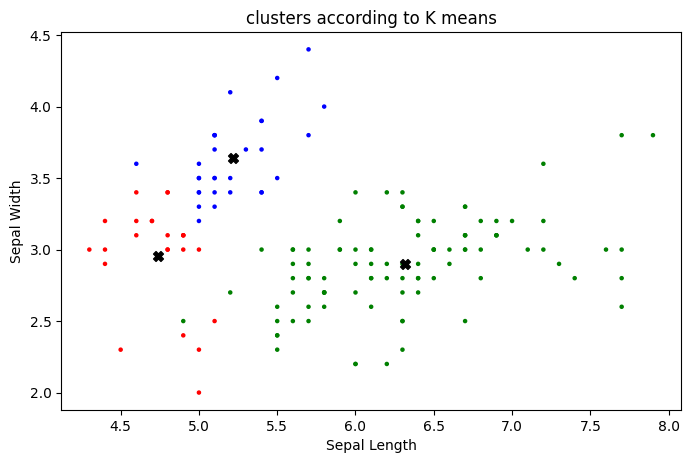

In [27]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 500/my_dpi), dpi = my_dpi)

plt.scatter(dataset[:,0],dataset[:,1], s = 5,color = cluster_assignment)
plt.scatter(centeroids[:,0],centeroids[:,1], color = 'black', marker='X',s=50)
plt.title("clusters according to K means")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

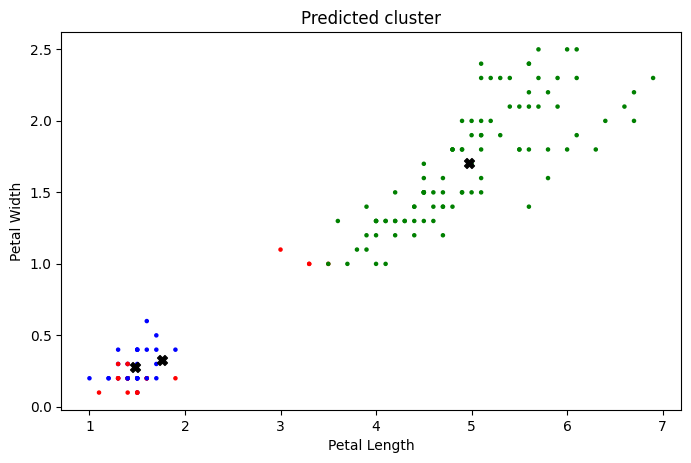

In [28]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 500/my_dpi), dpi = my_dpi)

plt.scatter(dataset[:,2],dataset[:,3], s = 5, color= cluster_assignment)
plt.scatter(centeroids[:,2],centeroids[:,3], color = 'black', marker='X',s=50)
plt.title("Predicted cluster")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')